# **First Project - ML**

*Shir Sharoni, Itamar Avieli, Omer Abraham, Mor Baruch*

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import math


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm as notebook_tqdm

# **Exploring the Data**

In [2]:
df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/train.csv?raw=true')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


# Features Explanation
1. **datetime** - time of rental
2. **season** - (1:winter, 2:spring, 3:summer, 4:fall)
3. **holiday** - (Is it a bank holiday? If so: 1, else 0)
4. **workingday** - (Is it a working day? If so: 1, else 0)
5. **weather** - 
          1: Clear, Few clouds, Partly cloudy, Partly cloudy
         2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
         3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
         4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. **temp** - temperature 
7. **atemp** - average temperature 

The rest are self explanatory:
8. humidity
9. windspeed
10. pollution
11. sunlight
12. traffic
13. count




## **Description tables**

In [3]:
def Describe_data (data : pd.DataFrame) : 
  columns_lst = ['Feature Name', 'Null', 'Type','Unique Values']
  final = pd.DataFrame (columns = columns_lst)
  for column in data.columns[:] : 
    cur_row =[column, data[column].isna().sum(), data[column].dtypes ,data[column].nunique()]
    final.loc[final.shape[0]] = cur_row
  return (final)

Describe_data(df)

,Feature Name,Null,Type,Unique Values
0,datetime,0,object,8164
1,season,0,int64,4
2,holiday,0,int64,2
3,workingday,0,int64,2
4,weather,0,int64,4
5,temp,0,float64,49
6,atemp,0,float64,60
7,humidity,0,int64,87
8,windspeed,0,float64,28
9,pollution,0,float64,8164


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


## **Correlation & Distribution Plots**

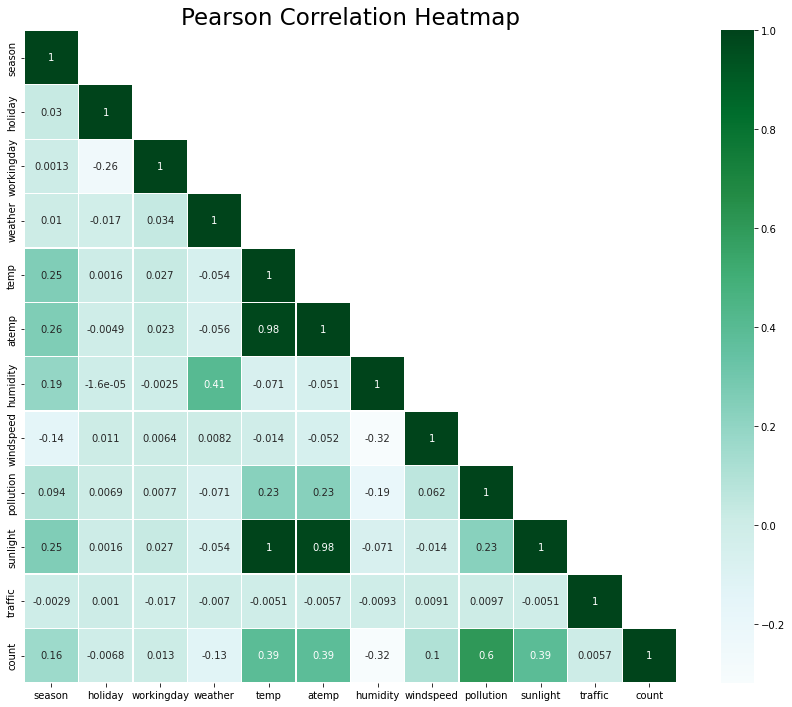

In [5]:
corr_df = df.corr()
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(corr_df, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

### **Few notes**
#### **Correlation**
1. Temp, atemp and sunlight have a high correlation between each other. Also, we can see that they have almost the same distirbution. We beleive that one feature will be enough. Hence, we deciced to drop "atemp" beacuse the data is separated by hours so a daily avarge will less fit in our opinion, same as for "sunlight". --->  We will choose "temp".
2. Looking at our label "Count" we can see that it has a high correlation with "pollution". Small correlation with "temp" and a opposite correlation with "humidity", this all makes sense to us when we speak about bike rental. Therefore we assume that "pollution" we will be an important feature in our model.


#### **Another look at the correlated features**

Temp & Avg Temp

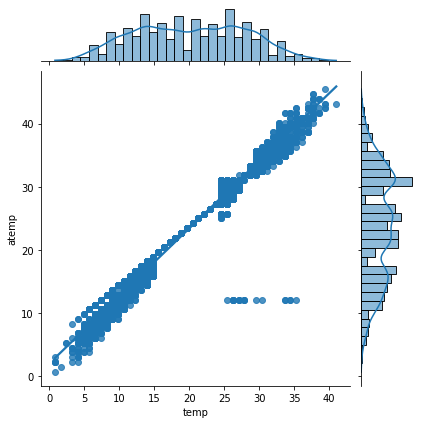

In [6]:
sns.jointplot(x=df['temp'], 
              y=df['atemp'], 
              data=df, 
              kind="reg")
plt.show()

Temp & Sunlight

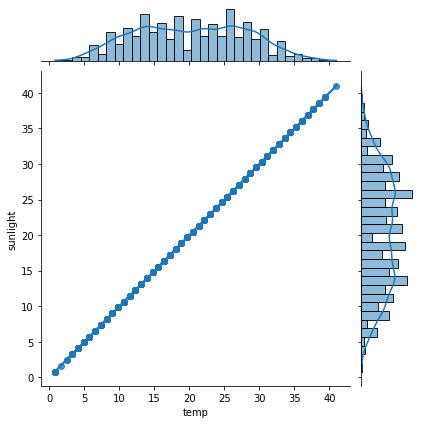

In [7]:
sns.jointplot(x=df['temp'], 
              y=df['sunlight'], 
              data=df, 
              kind="reg")
plt.show()

#### **Correlation with the labels**

Count & Pollution

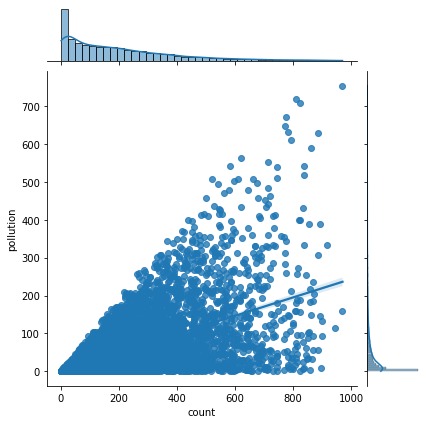

In [8]:
sns.jointplot(x=df['count'], 
              y=df['pollution'], 
              data=df, 
              kind="reg")
plt.show()

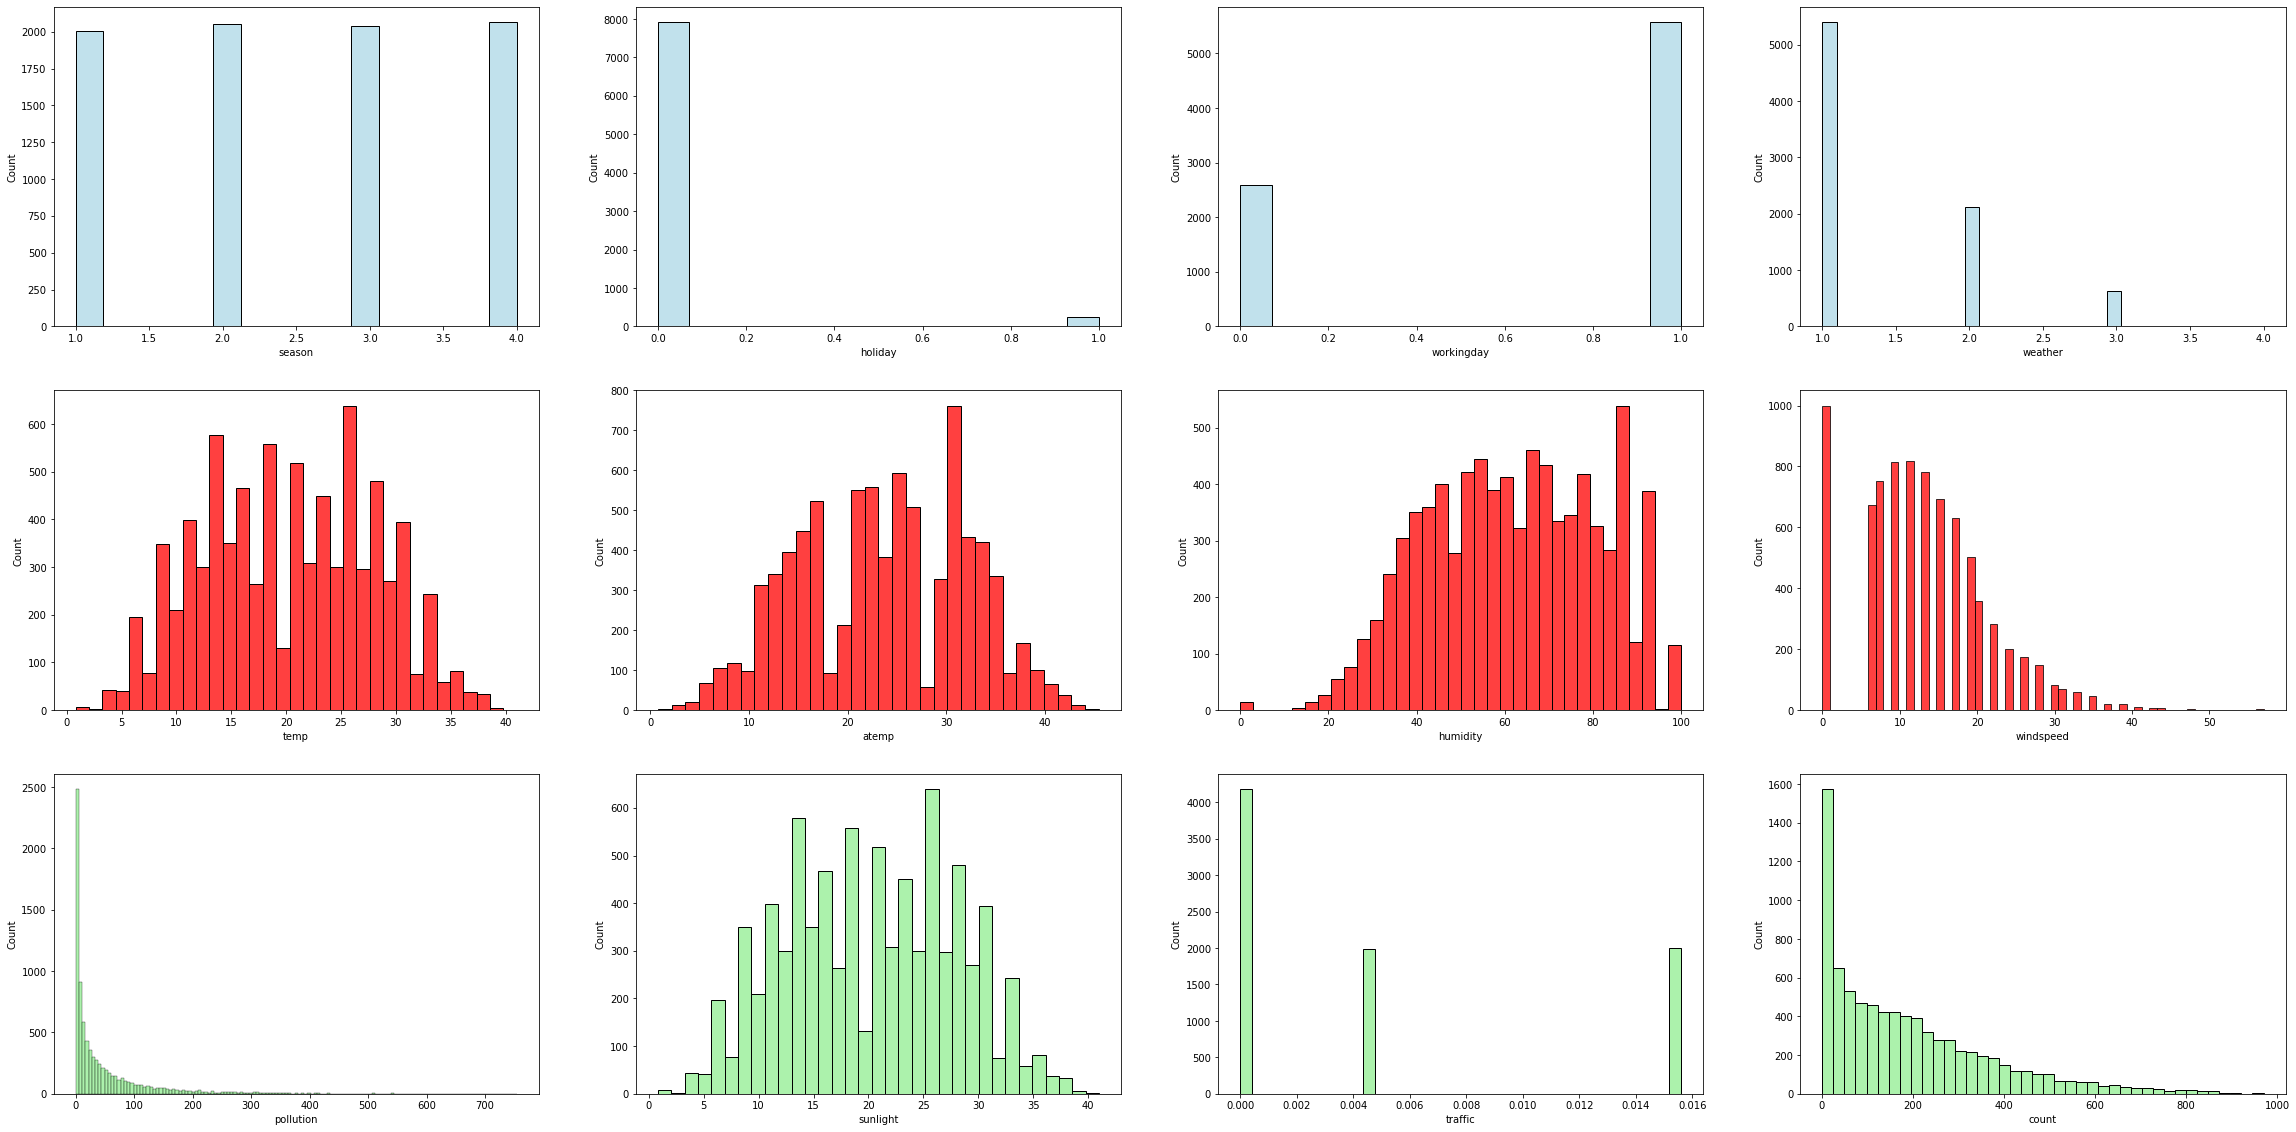

In [9]:
df_wo_datetime = df.drop(['datetime'], axis = 1)
figure, axes = plt.subplots(3, 4, figsize=(40, 20))
# figure.delaxes(axes[2,3])

def get_color(row):
  if row == 0:
    return 'lightblue'
  if row == 1:
    return 'red'
  else:
    return 'lightgreen'

for i in range(3):
  for j in range(4):
    sns.histplot(df_wo_datetime[df_wo_datetime.columns[4 * i + j]], ax=axes[i, j], color=get_color(i))
plt.show()

#### **Distribution**
1. Most important thing when looking at features is to find the "Categorical" features. We can see that: "season", "holdiay", "working day", and "weather".
Because "season" and "weather" have 4 unique values we will make it a dummy feature. 
2. We can see that "pollution" has outliers we can eliminate.
3. "traffic" also seems a categorical feature (only four unique values) but it seems that every value displays the traffic size so we will keep it numrical. In addition it can be that in different datasets there will be more values.
4. As we can see it looks like there is an exponenetial distribution in our label, we will consider deleting outilers there. 


# Features Engineering


### Droping Features
As we explained above we will drop both "atemp" and "sunlight". After we engineer new feature that combaine all together

In [10]:
df['ef'] = df['temp']**2 + df['atemp']**2 + df['sunlight']**2
df = df.drop(['atemp'], axis=1)
df = df.drop(['sunlight'], axis=1)
df = df.drop(['temp'], axis=1)

### Outilers removing

We build a function that help us to locate outliers and then remove them by defining bounds to delete anomalies.

In [11]:
num_cols = ['humidity','windspeed','pollution']

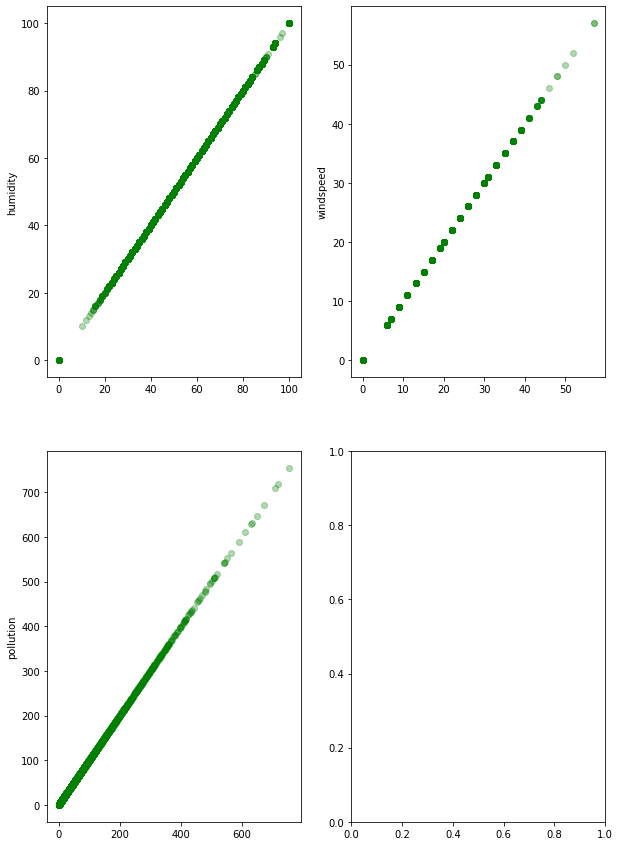

In [12]:
def scatterplot_features (data ,features):
    i,j=0,0
    PLOTS_PER_ROW = 2
    fig, axs = plt.subplots(math.ceil(len(features)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(10,15))
    for col in features:
        axs[i][j].scatter(data[col], data[col], color = 'g',alpha = 0.3)
        axs[i][j].set_ylabel(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()

scatterplot_features(df ,num_cols)

In [13]:
def Remove_numeric_outliers (data,features):
  for f in features : 
    if (data[f].nunique() > 30):
      slices = (data[f].max() - data[f].min())/10
      num = 0
      for i in range(10):
        lower_bound = data[f].min() + i * slices
        upper_bound = lower_bound + slices
        index = data[(lower_bound <= data[f]) & (data[f] <= upper_bound)].index
        if len(index) < 15: 
          data.drop(index,inplace = True)
          num += len(index)
      print (f'Number of outliers removed in feature {f} : {num}')
  return data

df = Remove_numeric_outliers(df,num_cols)

Number of outliers removed in feature humidity : 0
Number of outliers removed in feature pollution : 14


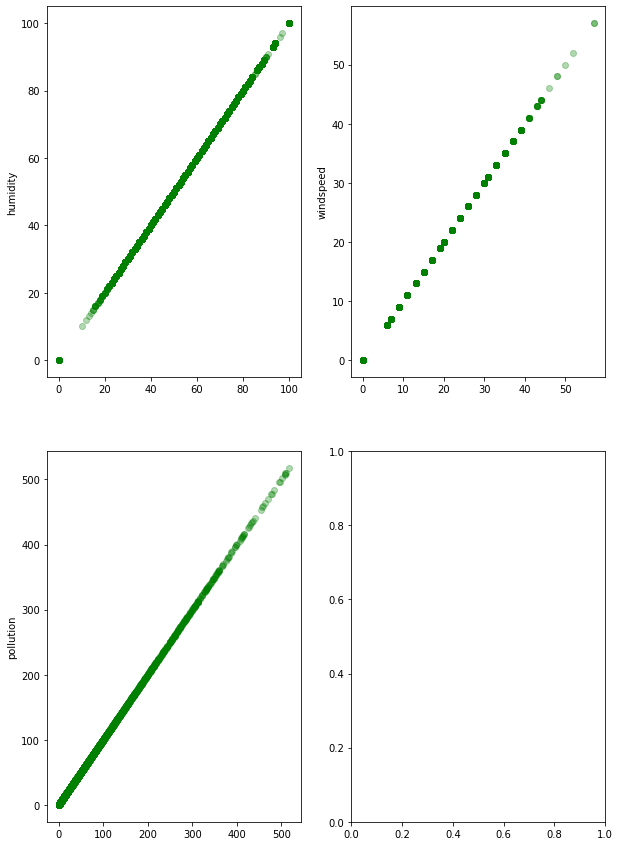

In [14]:
scatterplot_features(df ,num_cols)

## Datetime

As we can see in the data description above, each "date time" represents a unique row. Based on each sample, we will try to create new features. by the date and the time. 
1. We used for this purpose sinus anc cosinus functions.
2. Wetake the day, month & year as they are 


In [15]:
from datetime import datetime
def discretize_date(current_date, t):
    cdate = datetime.strptime(current_date, '%Y-%m-%d %H:%M:%S')
    if t == 'hour_sin':
        return np.sin(2 * np.pi * cdate.hour/24.0)
    if t == 'hour_cos':
        return np.cos(2 * np.pi * cdate.hour/24.0)
    if t == 'day_sin':
        return np.sin(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day_cos':
        return np.cos(2 * np.pi * cdate.timetuple().tm_yday/365.0)
    if t == 'day':
      return cdate.day
    if t == 'month':
      return cdate.month
    if t == 'year':
      return cdate.year

In [16]:
date_types = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos','day','month','year']
for dt in date_types:
    df[dt] = df['datetime'].apply(lambda x : discretize_date(x, dt))
df.drop(['datetime'],axis=1,inplace=True)


In [17]:
Describe_data(df)

,Feature Name,Null,Type,Unique Values
0,season,0,int64,4
1,holiday,0,int64,2
2,workingday,0,int64,2
3,weather,0,int64,4
4,humidity,0,int64,87
5,windspeed,0,float64,28
6,pollution,0,float64,8150
7,traffic,0,float64,4
8,count,0,int64,782
9,ef,0,float64,250


In [18]:
Y = df[['count']]
X = df.drop(['count'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Choosing models & parameters
We decided to train our data on these models:
1. Linear regression
3. Random forest
4. ADA Boost

We will build a function for each model, and it will serve us to determine which is the best.

In [19]:
models = {'Linear regression': None,
          'Random forest': None,
          'ADA Boost': None}

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Linear regression
We'll begin by building a linear regression function:

In [21]:
def run_linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
  return lr, cv_score

### Random forest

Let's setup a function that trains a random forest

In [22]:
def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=200, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

### ADA Boost

Let's setup a function that trains a ada boost

In [23]:
def run_ada_boost(x_train, y_train):
  rf = AdaBoostRegressor(n_estimators=200, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'loss': ['linear', 'square', 'exponential']},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

### Run all models
Let's run all models:

In [24]:
def run_all_models(x, y):
  models_dict = {}
  models_dict['Linear regression'] = run_linear_regression(x, y)
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['ADA Boost'] = run_ada_boost(x, y)
  return models_dict


In [25]:
models = run_all_models(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=auto;, score=-3768.462 total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=auto;, score=-3317.314 total time=   6.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=auto;, score=-4069.551 total time=   4.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=sqrt;, score=-4578.402 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=sqrt;, score=-3669.985 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=sqrt;, score=-4648.987 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .............max_features=log2;, score=-4578.402 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .............max_features=log2;, score=-3669.985 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .............max_features=log2;, score=-4648.987 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_features=0.3333333333333333;, score=-4314.452 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_features=0.3333333333333333;, score=-3559.431 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_features=0.3333333333333333;, score=-4422.438 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..................loss=linear;, score=-11369.397 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..................loss=linear;, score=-10381.556 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..................loss=linear;, score=-10390.036 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...................loss=square;, score=-9255.605 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...................loss=square;, score=-9540.202 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...................loss=square;, score=-9048.491 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .............loss=exponential;, score=-13099.749 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .............loss=exponential;, score=-11493.256 total time=   2.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .............loss=exponential;, score=-11839.948 total time=   2.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
models

{'Linear regression': (LinearRegression(),
  array([-13268.80634799, -11671.27427076, -13071.22832907])),
 'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'ADA Boost': GridSearchCV(cv=3,
              estimator=AdaBoostRegressor(n_estimators=200, random_state=42),
              param_grid={'loss': ['linear', 'square', 'exponential']},
              scoring='neg_mean_squared_error', verbose=3)}

Comparing their cross validation scores:

In [27]:
cv_scores = {}
cv_scores['Linear regression'] = np.sqrt(-models['Linear regression'][1].mean())
cv_scores['Random forest'] = np.sqrt(-models['Random forest'].best_score_)
cv_scores['ADA Boost'] = np.sqrt(-models['ADA Boost'].best_score_)

cv_scores

{'Linear regression': 112.56303263479774,
 'Random forest': 60.97903276815063,
 'ADA Boost': 96.34019030181328}

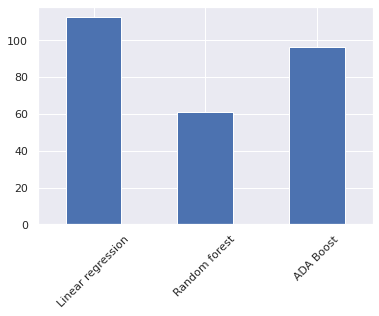

In [28]:
sns.set()
cv_scores_df = pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)

# Evaluating on test set

Let's evaluate all models:

In [29]:
from sklearn.metrics import mean_squared_error

def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return np.sqrt(mean_squared_error(y, y_pred))

Let's create a dictionary that includes only trained models:

In [30]:
trained_models_dict = {}
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['ADA Boost'] = models['ADA Boost'].best_estimator_
trained_models_dict

{'Linear regression': LinearRegression(),
 'Random forest': RandomForestRegressor(n_estimators=200, random_state=42),
 'ADA Boost': AdaBoostRegressor(loss='square', n_estimators=200, random_state=42)}

And create a function that iterates over all models:

In [31]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

Finally, let's run our function:

In [32]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict)
test_set_scores

{'Linear regression': 110.48314292840027,
 'Random forest': 53.58639189895571,
 'ADA Boost': 95.30953596801778}

### Overall comparison

Let's combine the two dictionaries:

In [33]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Linear regression': [112.56303263479774, 110.48314292840027],
 'Random forest': [60.97903276815063, 53.58639189895571],
 'ADA Boost': [96.34019030181328, 95.30953596801778]}

And compare the CV score to the test set score:

In [34]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Linear regression,112.563033,110.483143
Random forest,60.979033,53.586392
ADA Boost,96.340190,95.309536


### Feature importance

Let's find the importance of all features for each model and remove insignificant features:

In [35]:
feature_importance_dict = {}

#### Tree based methods

For tree based models we can use SKLearn's built-in methods:

In [36]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [37]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X_train.columns)
feature_importance_dict['ADA Boost'] = find_tree_feature_importance(trained_models_dict['ADA Boost'], X_train.columns)

#### Classical regression methods

One interpetation of feature importance for linear/ridge regression, is the normalized value of the estimator's coefficients:

In [38]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [39]:
X_train

,season,holiday,workingday,weather,humidity,windspeed,pollution,traffic,ef,hour_sin,hour_cos,day_sin,day_cos,day,month,year
3792,4,0,1,1,80,0.0000,0.006834,0.004489,348.652066,8.660254e-01,5.000000e-01,-0.478734,0.877960,2,12,2011
8157,1,0,1,2,93,15.0013,5.007903,0.000242,322.834106,1.224647e-16,-1.000000e+00,0.538005,0.842942,2,2,2011
6711,2,0,1,1,94,8.9981,0.042181,0.000242,1534.127441,2.588190e-01,9.659258e-01,0.717677,-0.696376,16,5,2011
4959,4,0,0,2,87,6.0032,55.283841,0.000000,692.305706,5.000000e-01,8.660254e-01,-0.238673,0.971100,16,12,2012
7570,4,0,1,2,78,16.9979,15.187342,0.000000,2039.233301,-9.659258e-01,-2.588190e-01,-0.984474,0.175531,11,10,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,1,0,0,1,47,32.9975,22.658549,0.004489,1042.955341,8.660254e-01,-5.000000e-01,0.974100,0.226116,19,3,2011
5402,3,0,1,1,78,6.0032,3.704842,0.000000,2250.034706,2.588190e-01,9.659258e-01,-0.559589,-0.828770,5,8,2011
860,4,0,1,3,100,6.0032,4.960762,0.000000,1133.600181,5.000000e-01,-8.660254e-01,-0.401488,0.915864,7,12,2011
7616,3,0,0,2,66,15.0013,133.492463,0.000000,3763.768101,-8.660254e-01,-5.000000e-01,-0.128748,-0.991677,8,7,2012


In [40]:
feature_importance_dict['Linear regression'] = find_normalized_lr_feature_importance(trained_models_dict['Linear regression'], X_train)

#### Comparison

Let's visualize the different feature imprtance across the models:

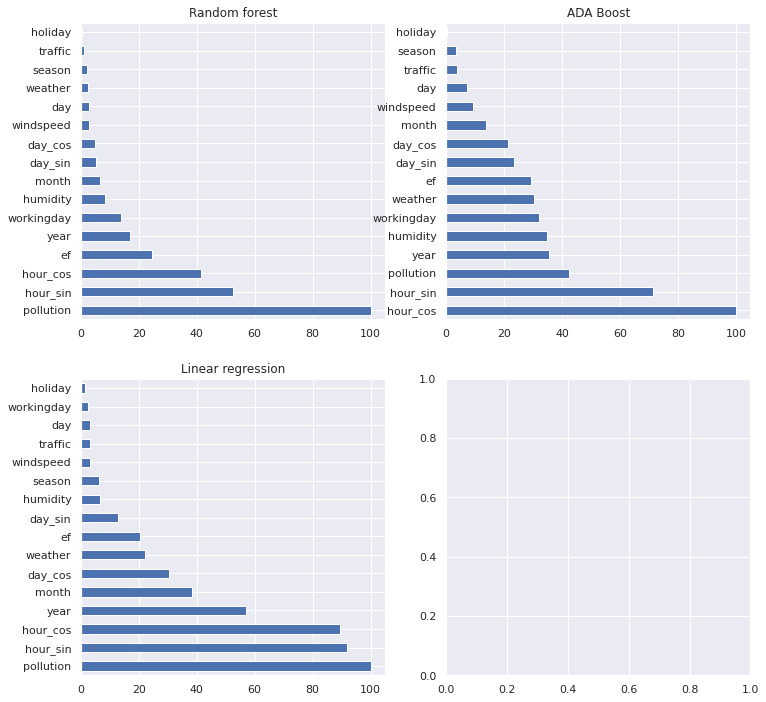

In [41]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['ADA Boost'].plot(kind='barh', ax=axes[0, 1], legend=False, title='ADA Boost')
feature_importance_dict['Linear regression'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Linear regression')

#### Removing weak features

Let's find the 3 weakest features in each model:

In [42]:
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-5:])
weak_features_dict

{'Random forest': ['day', 'weather', 'season', 'traffic', 'holiday'],
 'ADA Boost': ['windspeed', 'day', 'traffic', 'season', 'holiday'],
 'Linear regression': ['windspeed', 'traffic', 'day', 'workingday', 'holiday']}

And remove these features from each model. We create a dictionary mapping each model to X_train and X_test without the last 5 features:

In [43]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = (X_train.drop(v, axis=1), X_test.drop(v, axis=1))

Verify:

In [44]:
x_data_dict['Random forest'][0]

,workingday,humidity,windspeed,pollution,ef,hour_sin,hour_cos,day_sin,day_cos,month,year
3792,1,80,0.0000,0.006834,348.652066,8.660254e-01,5.000000e-01,-0.478734,0.877960,12,2011
8157,1,93,15.0013,5.007903,322.834106,1.224647e-16,-1.000000e+00,0.538005,0.842942,2,2011
6711,1,94,8.9981,0.042181,1534.127441,2.588190e-01,9.659258e-01,0.717677,-0.696376,5,2011
4959,0,87,6.0032,55.283841,692.305706,5.000000e-01,8.660254e-01,-0.238673,0.971100,12,2012
7570,1,78,16.9979,15.187342,2039.233301,-9.659258e-01,-2.588190e-01,-0.984474,0.175531,10,2011
...,...,...,...,...,...,...,...,...,...,...,...
5237,0,47,32.9975,22.658549,1042.955341,8.660254e-01,-5.000000e-01,0.974100,0.226116,3,2011
5402,1,78,6.0032,3.704842,2250.034706,2.588190e-01,9.659258e-01,-0.559589,-0.828770,8,2011
860,1,100,6.0032,4.960762,1133.600181,5.000000e-01,-8.660254e-01,-0.401488,0.915864,12,2011
7616,0,66,15.0013,133.492463,3763.768101,-8.660254e-01,-5.000000e-01,-0.128748,-0.991677,7,2012


In [45]:
x_data_dict['Random forest'][1]

,workingday,humidity,windspeed,pollution,ef,hour_sin,hour_cos,day_sin,day_cos,month,year
6589,1,72,12.9980,0.688616,1326.189386,7.071068e-01,7.071068e-01,0.956235,0.292600,3,2012
483,0,50,8.9981,126.058492,2341.851281,-9.659258e-01,-2.588190e-01,0.970064,0.242850,3,2012
7617,1,94,6.0032,82.859079,956.359826,-1.000000e+00,-1.836970e-16,-0.221922,0.975065,12,2012
3945,0,87,7.0015,3.653549,413.205746,8.660254e-01,-5.000000e-01,0.017213,0.999852,1,2012
7082,1,49,12.9980,114.029687,1643.981081,-8.660254e-01,5.000000e-01,0.796183,-0.605056,5,2011
...,...,...,...,...,...,...,...,...,...,...,...
7268,0,87,8.9981,50.748979,413.205746,-9.659258e-01,2.588190e-01,0.566702,0.823923,2,2012
5068,1,52,7.0015,66.124272,470.819786,1.224647e-16,-1.000000e+00,-0.321270,0.946988,12,2011
2872,1,57,11.0014,6.568203,1701.538961,0.000000e+00,1.000000e+00,-0.729558,-0.683919,8,2012
293,1,73,19.9995,78.861540,1757.414346,-9.659258e-01,2.588190e-01,0.409356,-0.912375,6,2012


Let's modify run_all_models to allow us to run on different datasets:

In [46]:
def run_all_models2(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'][0], y)
  models_dict['ADA Boost'] = run_ada_boost(x_dict['ADA Boost'][0], y)
  models_dict['Linear regression'] = run_linear_regression(x_dict['Linear regression'][0], y)
  return models_dict

And run:

In [47]:
models2 = {'Linear regression': None,
          'Random forest': None,
          'ADA Boost': None}

In [48]:
models2 = run_all_models2(x_data_dict, Y_train.values.ravel())
models2

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .............max_features=auto;, score=-3792.235 total time=   3.5s
[CV 2/3] END .............max_features=auto;, score=-3299.383 total time=   3.5s
[CV 3/3] END .............max_features=auto;, score=-4078.329 total time=   3.6s
[CV 1/3] END .............max_features=sqrt;, score=-4390.776 total time=   1.4s
[CV 2/3] END .............max_features=sqrt;, score=-3549.276 total time=   1.4s
[CV 3/3] END .............max_features=sqrt;, score=-4394.814 total time=   1.4s
[CV 1/3] END .............max_features=log2;, score=-4390.776 total time=   1.4s
[CV 2/3] END .............max_features=log2;, score=-3549.276 total time=   1.4s
[CV 3/3] END .............max_features=log2;, score=-4394.814 total time=   1.4s
[CV 1/3] END max_features=0.3333333333333333;, score=-4390.776 total time=   1.4s
[CV 2/3] END max_features=0.3333333333333333;, score=-3549.276 total time=   1.9s
[CV 3/3] END max_features=0.3333333333333333;, 

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'ADA Boost': GridSearchCV(cv=3,
              estimator=AdaBoostRegressor(n_estimators=200, random_state=42),
              param_grid={'loss': ['linear', 'square', 'exponential']},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-13222.9514162 , -11681.89946163, -13067.72763271]))}

In [49]:
cv_scores = {}
cv_scores['Random forest'] = np.sqrt(-models2['Random forest'].best_score_)
cv_scores['ADA Boost'] = np.sqrt(-models2['ADA Boost'].best_score_)
cv_scores['Linear regression'] = np.sqrt(-models2['Linear regression'][1].mean())
cv_scores

{'Random forest': 61.018979333870966,
 'ADA Boost': 94.08116887853703,
 'Linear regression': 112.50567172449892}

In [50]:
trained_models_dict2 = {}
trained_models_dict2['Random forest'] = models2['Random forest'].best_estimator_
trained_models_dict2['ADA Boost'] = models2['ADA Boost'].best_estimator_
trained_models_dict2['Linear regression'] = models2['Linear regression'][0]
trained_models_dict2

{'Random forest': RandomForestRegressor(n_estimators=200, random_state=42),
 'ADA Boost': AdaBoostRegressor(loss='square', n_estimators=200, random_state=42),
 'Linear regression': LinearRegression()}

We'll need to modify evaluate_all_models as well:

In [51]:
def evaluate_all_models2(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k][1], y, v)
  return test_set_scores

In [52]:
test_set_scores = evaluate_all_models2(x_data_dict, Y_test, trained_models_dict2)
test_set_scores

{'Random forest': 55.84973450445214,
 'ADA Boost': 93.81342398025201,
 'Linear regression': 110.45338001430308}

In [53]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [61.018979333870966, 55.84973450445214],
 'ADA Boost': [94.08116887853703, 93.81342398025201],
 'Linear regression': [112.50567172449892, 110.45338001430308]}

Let's look at the new:

In [54]:
new_scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,61.018979,55.849735
ADA Boost,94.081169,93.813424
Linear regression,112.505672,110.453380


# Conclusions
As we can see above the result with all the features are better, hence we will stay with the score from before that is: 
                    Train.      Test.
1. Linear regression	112.563033	110.483143
2. **Random forest	60.979033	53.586392**
3. ADA Boost	96.340190	95.309536

In [55]:
trained_models_dict

{'Linear regression': LinearRegression(),
 'Random forest': RandomForestRegressor(n_estimators=200, random_state=42),
 'ADA Boost': AdaBoostRegressor(loss='square', n_estimators=200, random_state=42)}

# Evaluate data test

In [56]:
df_test = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/test.csv?raw=true')

In [57]:
df_test['ef'] = df_test['temp']**2 + df_test['atemp']**2 + df_test['sunlight']**2
df_test = df_test.drop(['atemp'], axis=1)
df_test = df_test.drop(['sunlight'], axis=1)
df_test = df_test.drop(['temp'], axis=1)

In [58]:
for dt in date_types:
    df_test[dt] = df_test['datetime'].apply(lambda x : discretize_date(x, dt))
df_test.drop(['datetime'],axis=1,inplace=True)

In [59]:
Y = df_test['count']
X = df_test.drop(['count'], axis=1)

In [60]:
test_set_scores = evaluate_all_models(X, Y, trained_models_dict)
test_set_scores

{'Linear regression': 109.3622250072792,
 'Random forest': 50.78858711967468,
 'ADA Boost': 95.60797591435187}

Let's retrieve the information from our data for the CSV file

In [61]:
#Best params
print(models['Random forest'].best_params_)
print(models['ADA Boost'].best_params_)



{'max_features': 'auto'}
{'loss': 'square'}


In [62]:
model_list = test_set_scores.keys()
Score_list = test_set_scores.values()

In [63]:
X

,season,holiday,workingday,weather,humidity,windspeed,pollution,traffic,ef,hour_sin,hour_cos,day_sin,day_cos,day,month,year
0,3,0,1,1,59,0.0000,10.317020,0.015615,3872.698541,2.588190e-01,-9.659258e-01,-0.296713,-0.954967,19,7,2011
1,1,1,0,1,54,6.0032,3.502209,0.004489,80.140601,1.000000e+00,6.123234e-17,0.271958,0.962309,16,1,2012
2,4,0,0,1,48,12.9980,25.945915,0.000000,322.834106,-1.000000e+00,-1.836970e-16,-0.337523,0.941317,11,12,2011
3,3,0,1,2,62,12.9980,116.935908,0.004489,2905.047941,5.000000e-01,-8.660254e-01,-0.705584,-0.708627,15,8,2012
4,2,0,1,1,53,16.9979,120.824789,0.015615,2257.127241,-2.588190e-01,9.659258e-01,0.263665,-0.964614,15,6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,1,0,0,1,29,27.9993,44.665581,0.000242,1428.118601,-7.071068e-01,-7.071068e-01,0.974100,0.226116,19,3,2011
2718,1,0,0,1,37,19.9995,31.090380,0.000000,956.359826,-8.660254e-01,-5.000000e-01,0.137279,0.990532,8,1,2012
2719,3,0,1,1,74,8.9981,1.075298,0.015615,2429.264921,9.659258e-01,2.588190e-01,-0.162807,-0.986658,11,7,2011
2720,3,0,0,1,65,11.0014,2.291586,0.004489,2429.264921,8.660254e-01,-5.000000e-01,-0.247022,-0.969010,16,7,2011


In [64]:
df2 = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20I/train.csv?raw=true')
df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


In [65]:
results = {'model': model_list,
           'Score (RMSE)': Score_list,
           'Hyperparams used': [ ['None'], ['max_features: auto'], ['loss : square'] ],
           'Features dropped': [['datetime','temp','atemp','sunlight','traffic'], ['datetime','temp','atemp','sunlight','traffic'], ['datetime','temp','atemp','sunlight','traffic']],
           'New features created': [['hour_sin','hour_cos','day_sin','day_cos','day','month','year','ef'], ['hour_sin','hour_cos','day_sin','day_cos','day','month','year','ef'], ['hour_sin','hour_cos','day_sin','day_cos','day','month','year','ef']],
           'Runtime trainining + inference (seconds)': [47, 47, 47],
           'Hardware used (GPU/CPU/TPU)': ['GPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)': [['hour_sin','hour_cos','pollution'], ['hour_sin','hour_cos','pollution'], ['hour_sin','hour_cos','pollution']]
           }

df = pd.DataFrame(results)
df

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,Linear regression,109.362225,[None],"[datetime, temp, atemp, sunlight, traffic]","[hour_sin, hour_cos, day_sin, day_cos, day, mo...",47,GPU,"[hour_sin, hour_cos, pollution]"
1,Random forest,50.788587,[max_features: auto],"[datetime, temp, atemp, sunlight, traffic]","[hour_sin, hour_cos, day_sin, day_cos, day, mo...",47,GPU,"[hour_sin, hour_cos, pollution]"
2,ADA Boost,95.607976,[loss : square],"[datetime, temp, atemp, sunlight, traffic]","[hour_sin, hour_cos, day_sin, day_cos, day, mo...",47,GPU,"[hour_sin, hour_cos, pollution]"


In [66]:
import os
df.to_csv(os.path.join(os.getcwd(), 'SOMI.csv'))